In [1]:
# importing relevant packages - 
# data transformation packages 
import pandas as pd 
import numpy as np
# data visualization -
import seaborn as sns
# splitting data - 
from sklearn.model_selection import train_test_split
# automatic feature selection package (do not rely on this as model score typically goes down, could be useful later)
from featurewiz import featurewiz
# machine learning relevant packages - 
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
# accuracy and testing strength of model-
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error 

Imported 0.2.04 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



In [2]:
df = pd.read_csv('/Users/naveenmsu/Desktop/Competition/DSU Competition Development Data.csv')

In [3]:
def transform_df(df):
    df[['CurrentMonth','CurrentDay','CurrentYear']] = df['CurrentDate'].str.split("/", expand = True)
    df[['AccountDetail2Month','AccountDetail2Day','AccountDetail2Year']] = df['AccountDetail2'].str.split("/", expand = True)
    df[['AccountStatus2Month','AccountStatus2Day','AccountStatus2Year']] = df['AccountStatus2'].str.split("/", expand = True)
    df[['PrevAccountDetail1Month','PrevAccountDetail1Day','PrevAccountDetail1Year']] = df['PrevAccountDetail1'].str.split("/", expand = True)
    df[['AccountDetail8Month','AccountDetail8Day','AccountDetail8Year']] = df['AccountDetail8'].str.split("/", expand = True)
    df[['Payment2Month','Payment2Day','Payment2Year']] = df['Payment2'].str.split("/", expand = True)
    df[['Payment4Month','Payment4Day','Payment4Year']] = df['Payment4'].str.split("/", expand = True)
    df['AccountDetail5'] = df['AccountDetail5'].replace(['X'],1)
    df['AccountDetail6'] = df['AccountDetail6'].replace(['X'],1)
    df['AccountDetail5'].fillna(0,inplace=True)
    df['AccountDetail6'].fillna(0,inplace=True)
    df.loc[df['AccountStatus1'] == 'O',"AccountStatus1O"] = 1
    df['AccountStatus1O'].fillna(0,inplace=True)
    df.loc[df['AccountStatus1'] == 'D',"AccountStatus1D"] = 1
    df['AccountStatus1D'].fillna(0,inplace=True)
    df.loc[df['AccountStatus1'] == 'X',"AccountStatus1X"] = 1
    df['AccountStatus1X'].fillna(0,inplace=True)
    df.loc[df['AccountStatus1'] == 'N',"AccountStatus1N"] = 1
    df['AccountStatus1N'].fillna(0,inplace=True)
    df.loc[df['PrevAccountStatus1'] == 'C',"PrevAccountStatus1C"] = 1
    df['PrevAccountStatus1C'].fillna(0,inplace=True)
    df.loc[df['PrevAccountStatus1'] == 'E',"PrevAccountStatus1E"] = 1
    df['PrevAccountStatus1E'].fillna(0,inplace=True)
    df.loc[df['PrevAccountStatus1'] == 'A',"PrevAccountStatus1A"] = 1
    df['PrevAccountStatus1A'].fillna(0,inplace=True)
    df.loc[df['PrevAccountStatus1'] == 'I',"PrevAccountStatus1I"] = 1
    df['PrevAccountStatus1I'].fillna(0,inplace=True)
    df.loc[df['PrevAccountStatus1'] == 'Z',"PrevAccountStatus1Z"] = 1
    df['PrevAccountStatus1Z'].fillna(0,inplace=True)
    df.loc[df['PrevAccountStatus1'] == 'B',"PrevAccountStatus1B"] = 1
    df['PrevAccountStatus1B'].fillna(0,inplace=True)
    df.loc[df['PrevAccountStatus1'] == 'F',"PrevAccountStatus1F"] = 1
    df['PrevAccountStatus1F'].fillna(0,inplace=True)
    df.loc[df['PrevAccountStatus2'] == 'O',"PrevAccountStatus2O"] = 1
    df['PrevAccountStatus2O'].fillna(0,inplace=True)
    df.loc[df['PrevAccountStatus2'] == 'D',"PrevAccountStatus2D"] = 1
    df['PrevAccountStatus2D'].fillna(0,inplace=True)
    df.loc[df['PrevAccountStatus2'] == 'X',"PrevAccountStatus2X"] = 1
    df['PrevAccountStatus2X'].fillna(0,inplace=True)
    df.loc[df['PrevAccountStatus2'] == 'N',"PrevAccountStatus2N"] = 1
    df['PrevAccountStatus2N'].fillna(0,inplace=True)
    df.drop(['AccountStatus1','PrevAccountStatus1',
               'PrevAccountStatus2','UniqueID',
               'CurrentDate','Payment4',
               'Payment2','AccountDetail8',
               'PrevAccountDetail1','AccountStatus2',
               'AccountDetail2'],axis=1,inplace=True)
    return df

In [4]:
df = transform_df(df)

In [5]:
df.shape

(300000, 82)

In [6]:
target = 'Target'

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.8 as the correlation limit. Change this limit to fit your needs...
ALERT: nrows=150. Hence featurewiz will randomly sample that many rows.
    Change nrows=None if you want all rows...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
        stratified split 150 rows from given 300000
    Loaded train data. Shape = (150, 82)
#### Single_Label Binary_Classification problem ####
No test data filename given...
Classifying features using a random sample of 150 r

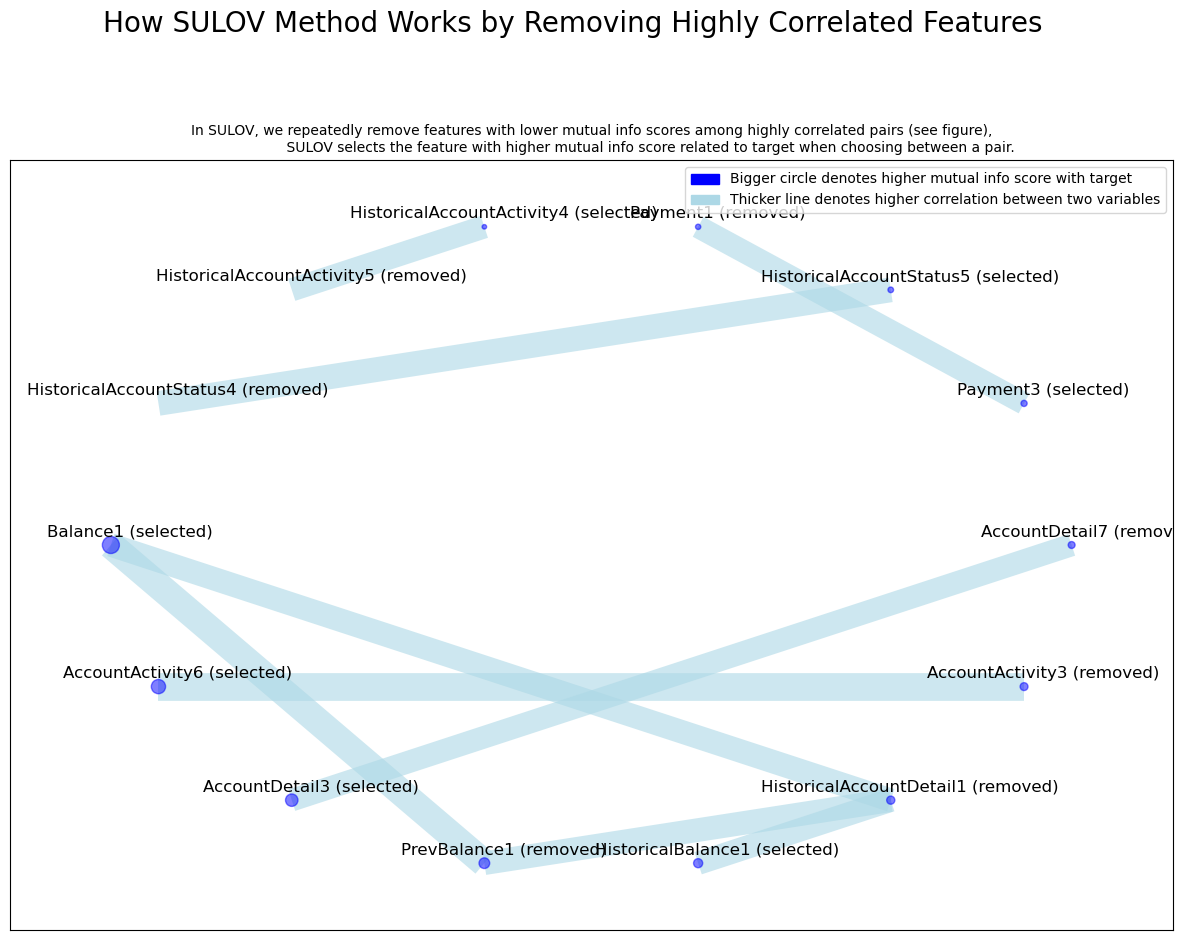

Time taken for SULOV method = 0 seconds
    Adding 15 categorical variables to reduced numeric variables  of 36
Finally 51 vars selected after SULOV
Converting all features to numeric before sending to XGBoost...
    there were no mixed data types or object columns that errored. Data is all numeric...
Shape of train data after adding missing values flags = (150, 77)
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 76 
    Taking top 8 features per iteration...
    XGBoost version using 1.7.1 as tree method: hist
Number of booster rounds = 100
        using 76 variables...
            selecting 5 features in this iteration
            Time taken for regular XGBoost feature selection = 0 seconds


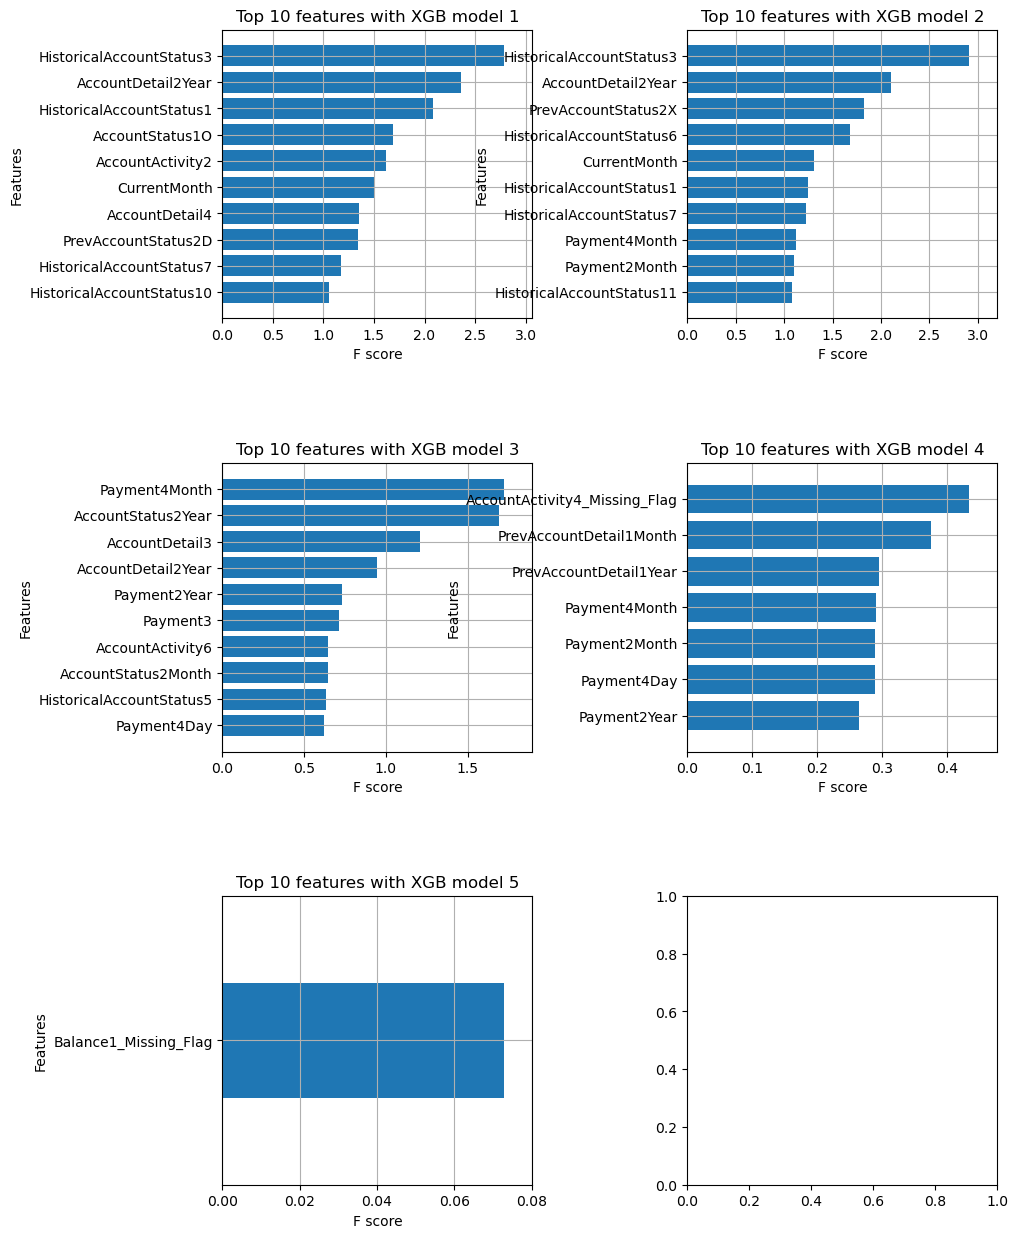

    Completed XGBoost feature selection in 0 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 11 important features:
['HistoricalAccountStatus3', 'AccountDetail2Year', 'HistoricalAccountStatus1', 'AccountStatus1O', 'AccountActivity2', 'PrevAccountStatus2X', 'HistoricalAccountStatus6', 'CurrentMonth', 'Payment4Month', 'AccountStatus2Year', 'AccountDetail3']
Total Time taken for featurewiz selection = 2 seconds
Output contains a list of 11 important features and a train dataframe


In [7]:
feats, train = featurewiz(df, target, corr_limit=0.8, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="", nrows=150)

In [8]:
X_new = train.drop(['Target'],axis=1)
y = train.Target

In [9]:
X_scaled = StandardScaler().fit_transform(X_new)

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled,y,test_size = 0.2,stratify=y, random_state=1)

In [11]:
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [12]:
# make prediction 
preds = classifier.predict(X_valid) 
# check performance
accuracy_score(preds,y_valid) 

0.8333333333333334

In [13]:
confusion_matrix(y_valid,preds)

array([[14,  1],
       [ 4, 11]])

In [14]:
print("Accuracy is ", accuracy_score(preds,y_valid) )

Accuracy is  0.8333333333333334
